In [71]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env
import wrangle
import scipy.stats
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(123)

# Acquire and Prepare Data 

In [88]:
df = wrangle.wrangle_zillow()


Acquiring data from SQL database


In [89]:
df.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
52440,3,2.0,1762,522000,1955,6037
52439,3,1.0,1032,49546,1954,6037


# Scaling 

### Exercises 

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

### Split Data

In [90]:
def split_zillow_data(df):
    '''
    This function performs split on zillow data
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test


In [91]:
train, validate, test = split_zillow_data(df)

In [92]:
train.shape

(21789, 6)

In [93]:
validate.shape

(9339, 6)

In [94]:
test.shape

(7783, 6)

In [56]:
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']

In [57]:
#create a train_scaled that is a copy of train 
train_scaled = train.copy()
#assign the scaler 
scaler = MinMaxScaler()
#pass through columns to scale into train_scaled then fit_transform 
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [58]:
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
49171,1.000000,0.6,0.703374,474761,1971,6111
25865,0.333333,0.4,0.355466,290756,1953,6037
38951,0.666667,0.6,0.744669,596975,1959,6037
23468,0.333333,0.4,0.358974,251875,1953,6037
9755,0.000000,0.4,0.412686,328192,1934,6037
...,...,...,...,...,...,...
1644,0.333333,0.4,0.374899,255000,2007,6037
14265,0.333333,0.4,0.310391,367613,1963,6059
33718,1.000000,0.4,0.611606,125469,1927,6037
38435,1.000000,0.5,0.572200,445115,1967,6059


In [59]:
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
49171,5,3.0,2758,474761,1971,6111
25865,3,2.0,1469,290756,1953,6037
38951,4,3.0,2911,596975,1959,6037
23468,3,2.0,1482,251875,1953,6037
9755,2,2.0,1681,328192,1934,6037
...,...,...,...,...,...,...
1644,3,2.0,1541,255000,2007,6037
14265,3,2.0,1302,367613,1963,6059
33718,5,2.0,2418,125469,1927,6037
38435,5,2.5,2272,445115,1967,6059


In [60]:
#Function to compare columns before and after scale 
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

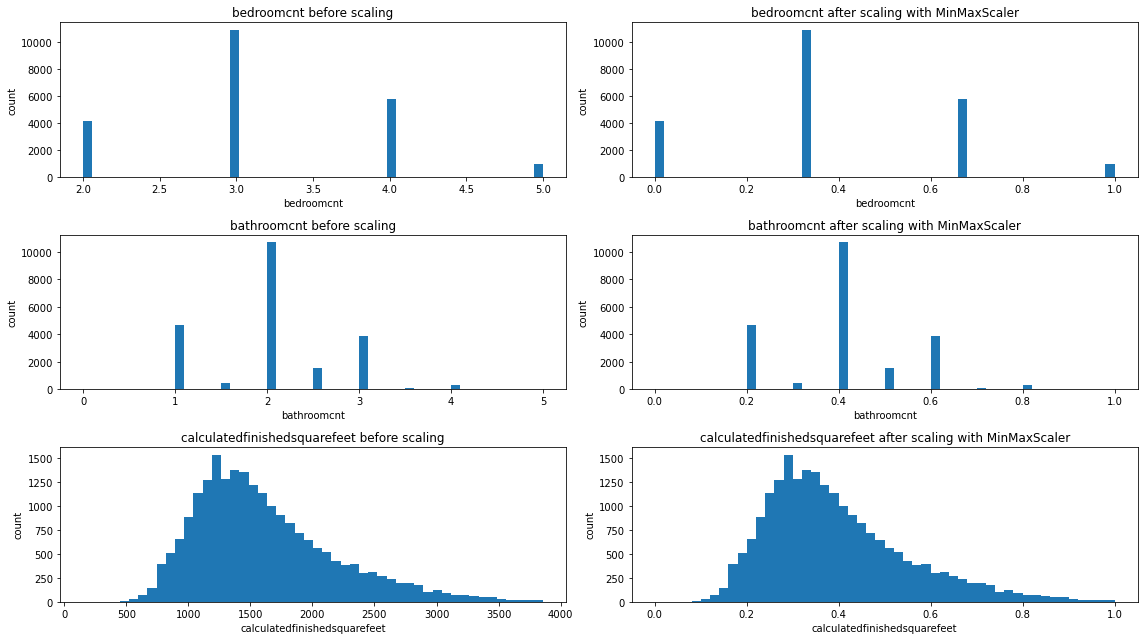

In [61]:
#The charts look virtually the same because I dropped my outliers
#The benefit is not in the distribution, but in evening out the numeric values (square feet vs bedroom count)
visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

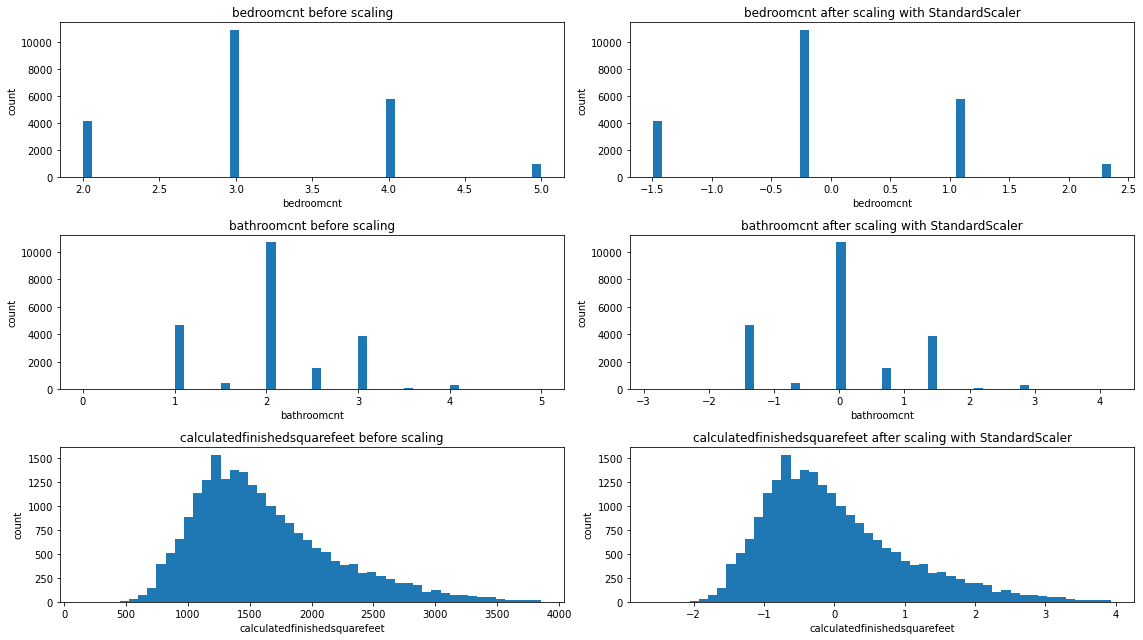

In [63]:
#looks the same as the last
#standard scaler 
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

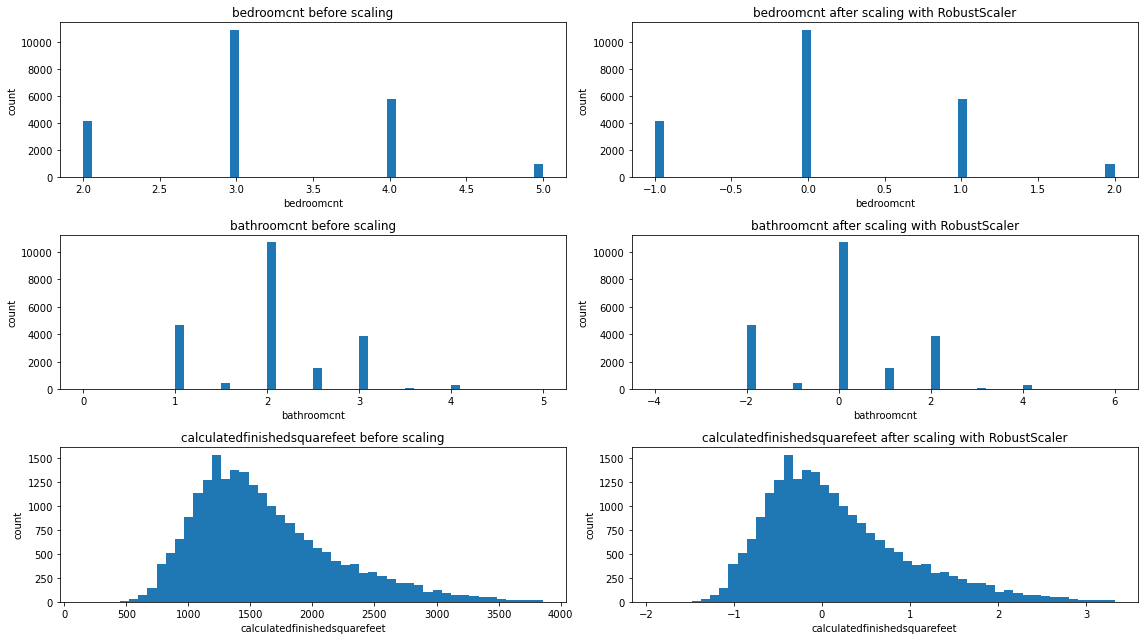

In [64]:
#Robust Scaler
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

# Lmplots

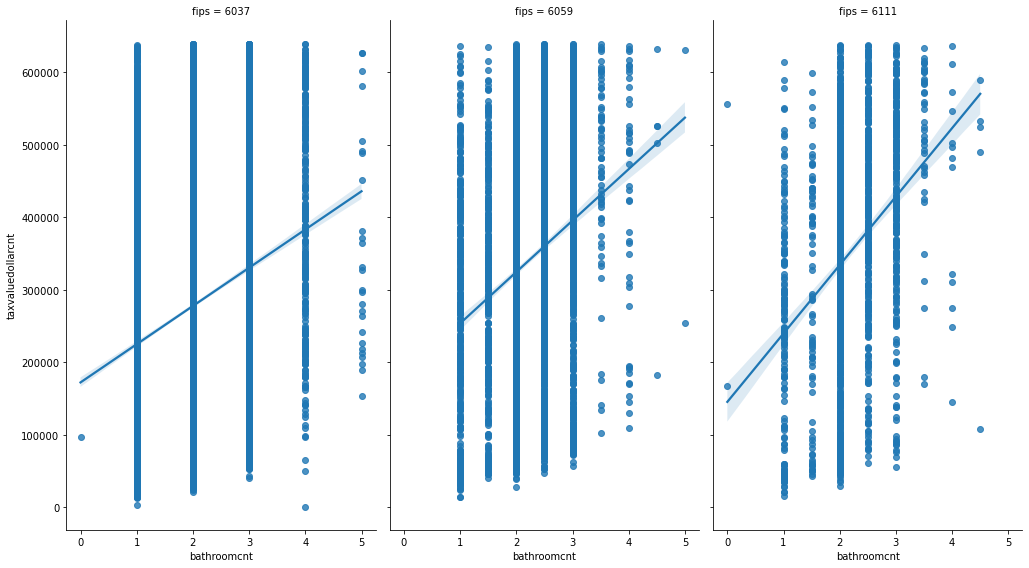

In [62]:
sns.lmplot(x='bathroomcnt', y='taxvaluedollarcnt', data=train, col='fips', aspect=0.6,size=8)

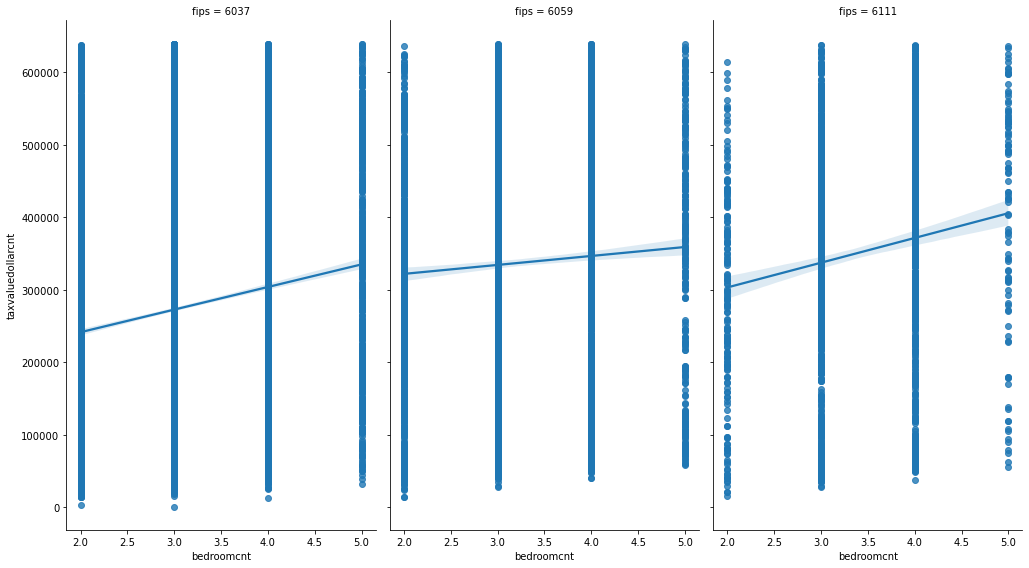

In [47]:
sns.lmplot(x='bedroomcnt', y='taxvaluedollarcnt', data=train, col='fips', aspect=0.6,size=8)

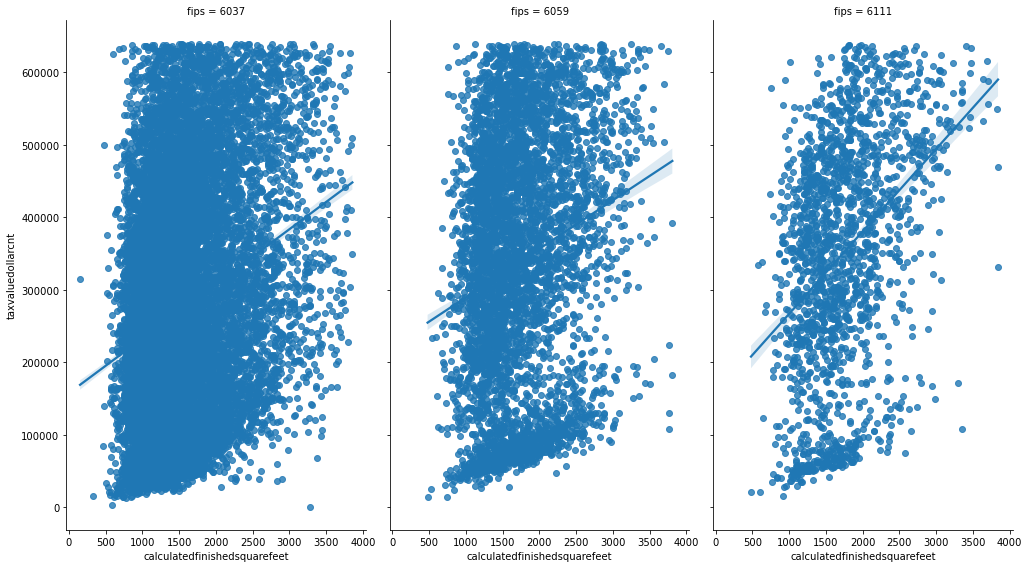

In [48]:
sns.lmplot(x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data=train, col='fips', aspect=0.6,size=8)

### Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [66]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
49171,5,3.0,2758,474761,1971,6111
25865,3,2.0,1469,290756,1953,6037
38951,4,3.0,2911,596975,1959,6037
23468,3,2.0,1482,251875,1953,6037
9755,2,2.0,1681,328192,1934,6037


In [67]:
#apply MinMaxScaler
scaler = MinMaxScaler()
#only want the target variable
original_data = train[['taxvaluedollarcnt']]
#fit transform data
scaled_data = scaler.fit_transform(original_data)

In [68]:
#inverse transform scaled data 
scaler.inverse_transform(scaled_data)[:5]

array([[474761.],
       [290756.],
       [596975.],
       [251875.],
       [328192.]])

In [69]:
(scaler.inverse_transform(scaled_data) == original_data)

,taxvaluedollarcnt
49171,True
25865,True
38951,True
23468,True
9755,True
...,...
1644,False
14265,True
33718,False
38435,True


Key Takeaway: 
- Point 
- Point 
- Point 

### Quantile Transformer

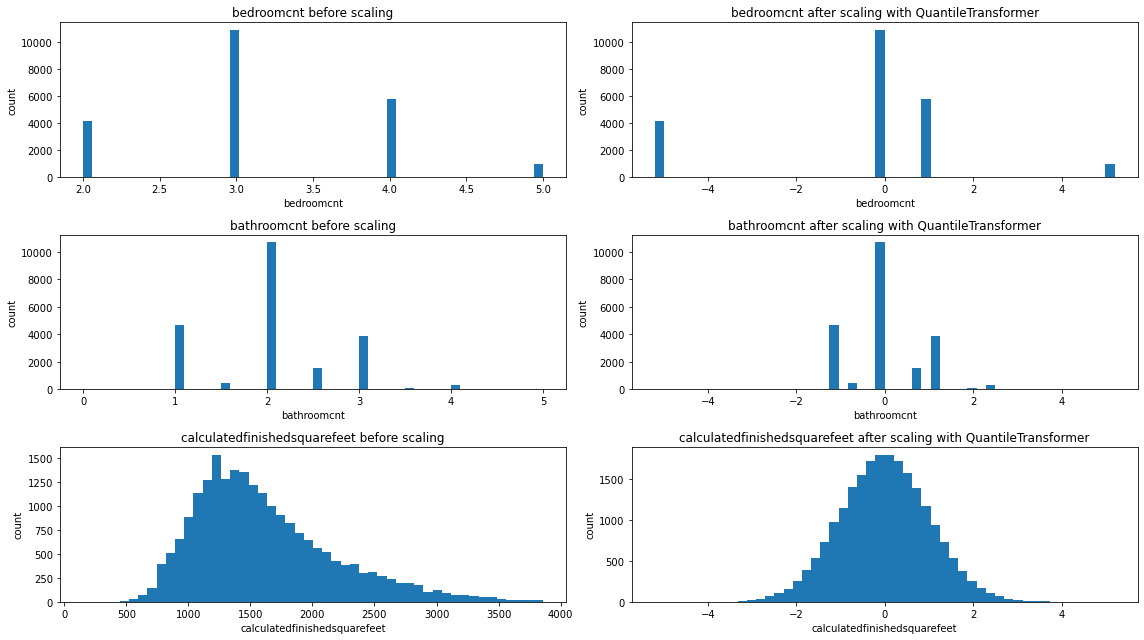

In [72]:
#Quantile Transformer 
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins=50)

# Creating a Pipeline Function 

In [101]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled


In [102]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)


In [103]:
train_scaled.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
49171,1.000000,0.6,0.703374,474761,1971,6111
25865,0.333333,0.4,0.355466,290756,1953,6037


In [104]:
validate_scaled.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
18701,0.000000,0.4,0.378138,262469,1985,6111
48139,0.333333,0.5,0.404858,420009,2015,6111


In [105]:
test_scaled.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
18180,0.333333,0.4,0.352767,93148,1959,6037
2908,0.666667,0.4,0.507422,153900,1968,6037
